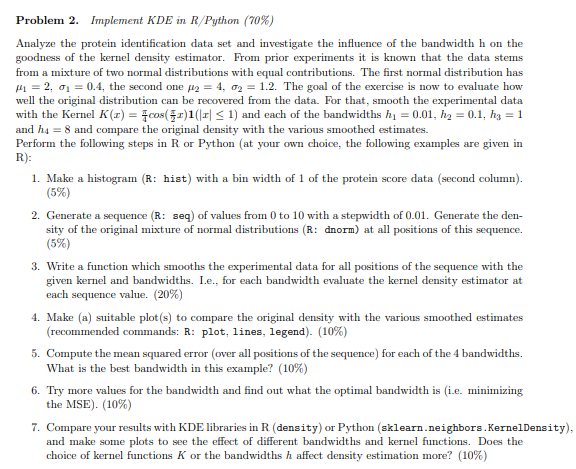

In [17]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import scipy.stats
import math
import seaborn as sns

In [2]:
data = pd.read_csv("C:/Users/Qba Liu/Documents/STUDIA/BIOINF_MASTER_BERLIN/SEMESTER_I/FOUNDATIONS_IN_MATH_AND_STATISTICS/LAB/ProteinID.csv", delimiter = ';')
data.head()

,index,score,peptide,protein
0,1,4.344,R.AMYTQAVQNIR.V,IPI00005924
1,2,2.024,K.DSDVEVYNIIKK.E,"IPI00002519,IPI00220668,IPI00220669"
2,3,2.621,K.LGQIPEGEGASEQGM[147.04]ARHSHSGLR.A,"IPI00413306,IPI00550276,IPI00550491"
3,4,2.385,K.FFQLFKPIM[147.04]INLPR.D,RRRRRIPI:IPI00024364.1|SWISS-PROT:Q92973|REFSE...
4,5,1.711,K.KILHIGELVNTIDYIR.R,RRRRRIPI:IPI00290663.5|SWISS-PROT:O00716|TREMB...


# Problem 2.1

Make a histogram (R: hist) with a bin width of 1 of the protein score data (second column).
(5%)

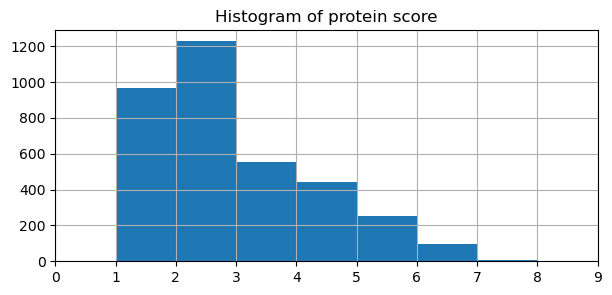

In [3]:
binwidth = 1
min_val = int(min(data['score']))
max_val = int(max(data['score']))
plt.figure(figsize = (7,3))
plt.hist(data['score'], bins=range(min_val, max_val + binwidth, binwidth))
plt.xlim(0,9)
plt.grid()
plt.title('Histogram of protein score')
plt.show()

# Problem 2.2

Generate a sequence (R: seq) of values from 0 to 10 with a stepwidth of 0.01. Generate the density of the original mixture of normal distributions (R: dnorm) at all positions of this sequence.
(5%)

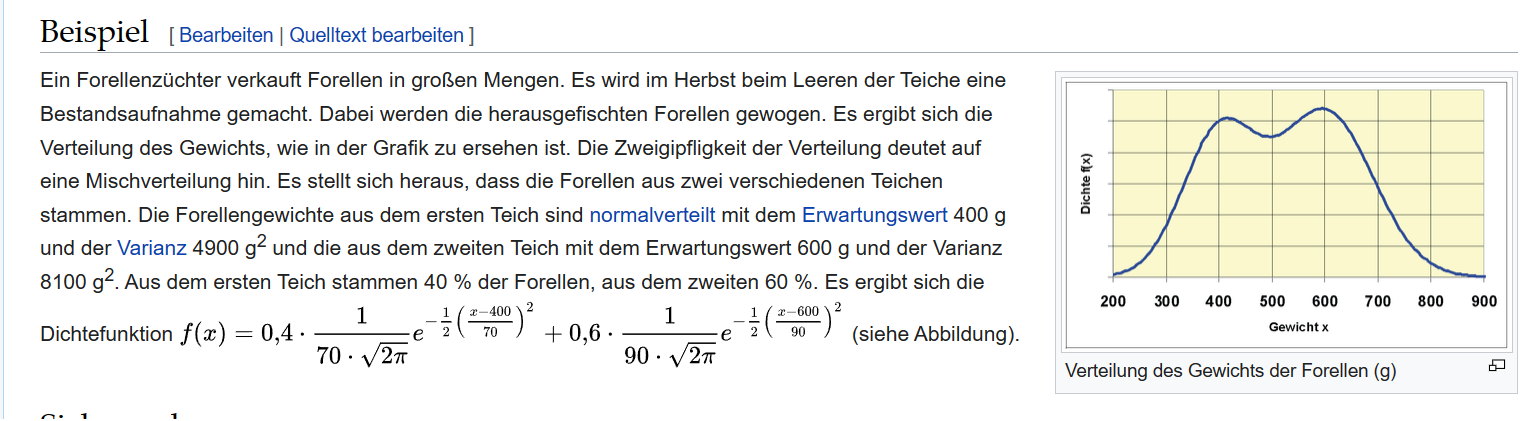

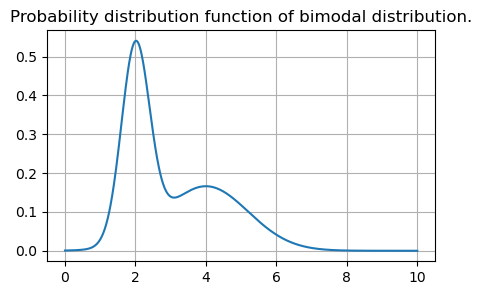

In [28]:
e = 2.718281828459045
pi = 3.14159265
std1 = 0.4
std2 = 1.2
mean1 = 2
mean2 = 4

def bimodal(x, conti1, conti2, std1, std2, mean1, mean2):
    left = conti1 * (1/(std1*math.sqrt(2*pi)))*e**((-0.5)*((x-mean1)/std1)**2)
    right = conti2 * 1/(std2*math.sqrt(2*pi))*e**((-0.5)*((x-mean2)/std2)**2)
    out = left + right
    return out

seq = np.linspace(0,10,1000)

density = []

for i in seq:
    density.append(bimodal(i, conti1 = 0.5, conti2 = 0.5, std1 = std1, std2 = std2, mean1 = mean1, mean2 = mean2))
    
plt.figure(figsize = (5,3))
plt.plot(seq, density)
plt.grid()
plt.title('Probability distribution function of bimodal distribution.')
plt.show()

# Problem 2.3.

In [5]:
def Kernel(x):
    pi = 3.14159265
    return (pi/4)*math.cos((pi/2)*x)
 
def density_small(x, X_i, h):
    return (x-X_i)/h

def density_big(x, data, h):
    sum = 0
    
    for i in data:
        
        u = density_small(x=x, X_i = i, h = h)
        
        if (abs(u) <= 1):
            sum = sum + Kernel(x = u)
            
    out = (1/(len(data)*h))*sum
    return out

# Problem 2.4.

In [47]:
data_score = list(data['score'])
seq = np.linspace(0,10,1000)

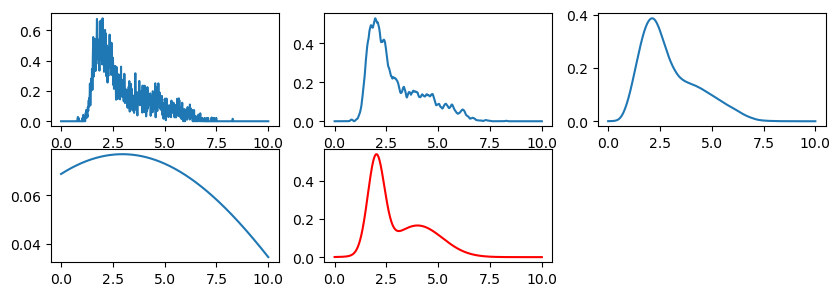

In [56]:
est_h1 = []
est_h2 = []
est_h3 = []
est_h4 = []
density_actual = []

for i in seq:
    estimate = density_big(x = i, data = data_score, h = 0.01)
    est_h1.append(estimate)
    
for i in seq:
    estimate = density_big(x = i, data = data_score, h = 0.1)
    est_h2.append(estimate)
    
for i in seq:
    estimate = density_big(x = i, data = data_score, h = 1)
    est_h3.append(estimate)
    
for i in seq:
    estimate = density_big(x = i, data = data_score, h = 10)
    est_h4.append(estimate)
    

for i in seq:
    density_actual.append(bimodal(i, conti1 = 0.5, conti2 = 0.5, std1 = std1, std2 = std2, mean1 = mean1, mean2 = mean2))
    
plt.figure(figsize = (10,5))
plt.subplot(3,3,1)
plt.plot(seq, est_h1)

plt.subplot(3,3,2)
plt.plot(seq, est_h2)

plt.subplot(3,3,3)
plt.plot(seq, est_h3)

plt.subplot(3,3,4)
plt.plot(seq, est_h4)

plt.subplot(3,3,5)
plt.plot(seq, density_actual, color = 'red')
plt.show()

# Problem 2.5

In [57]:
def MSE(actual, predicted):
    sum = 0
    
    for i in range(0, len(actual)):
        error = (actual[i] - predicted[i])**2
        sum = sum + error
    
    out = (1/len(actual))*sum
    return out

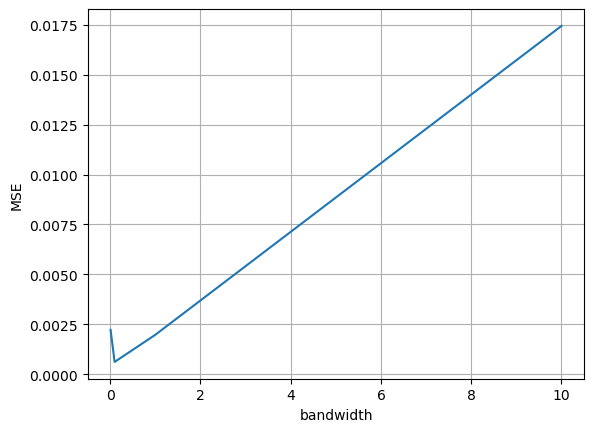

In [66]:
errors = []
h = [0.01, 0.1, 1, 10]

errors.append(MSE(actual = density_actual, predicted = est_h1))
errors.append(MSE(actual = density_actual, predicted = est_h2))
errors.append(MSE(actual = density_actual, predicted = est_h3))
errors.append(MSE(actual = density_actual, predicted = est_h4))

plt.plot(h, errors)
plt.grid()
plt.xlabel('bandwidth')
plt.ylabel('MSE')
plt.show()

# Problem 2.6.

In [74]:
band = np.linspace(0.01, 10, 100)
errors = []

for h in band:
    print(h)
    estimates = []
    for i in seq:
        estimate = density_big(x = i, data = data_score, h = h)
        estimates.append(estimate)
    error = MSE(actual = density_actual, predicted = estimates)
    errors.append(error)
    

0.01
0.1109090909090909
0.21181818181818182
0.31272727272727274
0.41363636363636364
0.5145454545454545
0.6154545454545455
0.7163636363636363
0.8172727272727273
0.9181818181818182
1.019090909090909
1.1199999999999999
1.220909090909091
1.3218181818181818
1.4227272727272726
1.5236363636363637
1.6245454545454545
1.7254545454545454
1.8263636363636364
1.9272727272727272
2.028181818181818
2.129090909090909
2.2299999999999995
2.3309090909090906
2.4318181818181817
2.5327272727272723
2.6336363636363633
2.7345454545454544
2.835454545454545
2.936363636363636
3.037272727272727
3.1381818181818177
3.239090909090909
3.34
3.4409090909090905
3.5418181818181815
3.6427272727272726
3.743636363636363
3.8445454545454543
3.9454545454545453
4.046363636363636
4.1472727272727266
4.248181818181818
4.349090909090909
4.449999999999999
4.550909090909091
4.651818181818181
4.752727272727272
4.8536363636363635
4.954545454545454
5.055454545454545
5.156363636363636
5.257272727272727
5.3581818181818175
5.459090909090909
5

Text(0, 0.5, 'MSE error')

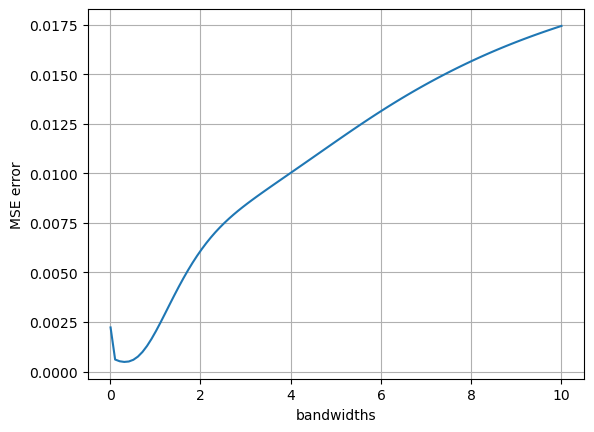

In [77]:
plt.plot(band, errors)
plt.grid()
plt.xlabel('bandwidths')
plt.ylabel('MSE error')